In [68]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
%matplotlib inline 
import reduction_steps_graph_gen as functions

In [70]:
import itertools
import collections

k = 4

def cliques_of_size(G, n):
    cliques = []
    for clique in nx.find_cliques(G):
        if len(clique) == n:
            cliques.append(set(clique))
            # Hier wil ik dus eigenlijk checken of K-1 elementen van lijst 1 overeenkomen met lijst 2. Als dit zo is dan
            # pak de unique elementen uit beide lijsten en merge deze nodes met elkaar.
    return cliques

def get_mergable_nodes(cliques, k):

    mergable_nodes = set()

    for clique_a, clique_b in itertools.combinations(cliques, 2):
        if len(clique_a & clique_b) == k - 1:
            mergable_nodes.add(tuple(clique_a ^ clique_b))
    
    return mergable_nodes

def symmetry(G, k):
    cliques = cliques_of_size(G, k)
    mergable = get_mergable_nodes(cliques, k)

    mergable_nodes = list(map(list, mergable))
    while mergable_nodes:
        node_a, node_b = mergable_nodes.pop()
        G = nx.contracted_nodes(G, node_a, node_b)

        for i in range(len(mergable_nodes)):
            if mergable_nodes[i][0] == node_b:
                mergable_nodes[i][0] = node_a
            elif mergable_nodes[i][1] == node_b:
                mergable_nodes[i][1] = node_a
                
    return G

def create_edge(G, K, node_1, node_2):
    if node_1 != node_2:
        G.add_edge(node_1, node_2)
    
    for clique in nx.cliques_containing_node(G, nodes=node_1):
        if node_2 in clique and len(clique) > K:
            G.remove_edge(node_1, node_2)
        
    return G

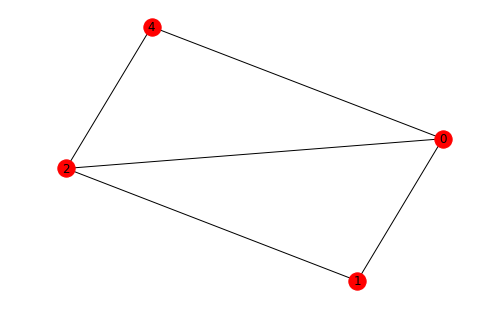

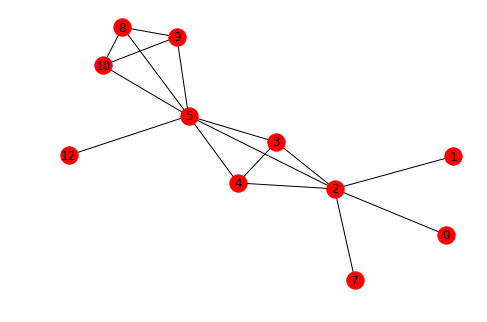

In [74]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,4)
G.add_edge(1,2)
G.add_edge(2,4)


G = create_edge(G, 3, 1, 4)

F = nx.Graph()
F.add_edge(0,2)
F.add_edge(1,2)
F.add_edge(2,3)
F.add_edge(2,4)
F.add_edge(2,5)
F.add_edge(3,4)
F.add_edge(3,5)
F.add_edge(4,5)
F.add_edge(2,7)
F.add_edge(5,8)
F.add_edge(5,9)
F.add_edge(5,10)
F.add_edge(8,9)
F.add_edge(8,10)
F.add_edge(9,10)
F.add_edge(5,10)
F.add_edge(5,12)

nx.draw(G,with_labels = True)
plt.show()

nx.draw(F,with_labels = True)
plt.show()

[]


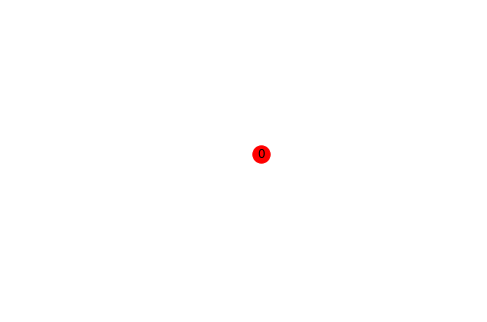

In [11]:
G = nx.Graph()
G.add_nodes_from(range(1))
print(G.edges())

nx.draw(G,with_labels = True)
plt.show()



======== defaultdict(<class 'set'>, {0: {3}, 3: {0}})


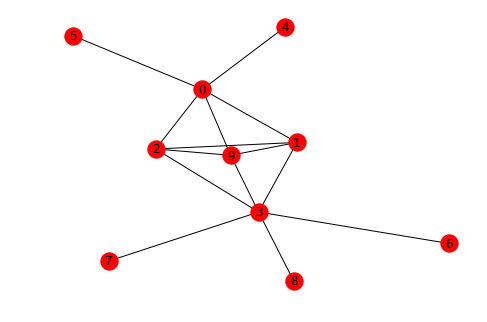

===== {(0, 3)}


In [67]:
import itertools
import collections

k = 4


def cliques_of_size(G, n):
    cliques = []
    for clique in nx.find_cliques(G):
        if len(clique) == n:
            cliques.append(set(clique))
            # Hier wil ik dus eigenlijk checken of K-1 elementen van lijst 1 overeenkomen met lijst 2. Als dit zo is dan
            # pak de unique elementen uit beide lijsten en merge deze nodes met elkaar.
    return cliques

def get_mergable_nodes(cliques, k):

    mergable_nodes = set()

    for clique_a, clique_b in itertools.combinations(cliques, 2):
        if len(clique_a & clique_b) == k - 1:
            mergable_nodes.add(tuple(clique_a ^ clique_b))
    
    return mergable_nodes
            
cliques = cliques_of_size(G, k)
mergable_nodes = get_mergable_nodes(cliques, k)

merge_dict = collections.defaultdict(set)
for node_a, node_b in mergable_nodes:
    merge_dict[node_a].add(node_b)
    merge_dict[node_b].add(node_a)
    
print("========", merge_dict)



# G = nx.contracted_nodes(G, 0, 3)
# G = nx.contracted_nodes(G, 0, 5)

nx.draw(G,with_labels = True)
plt.show()


print("=====", mergable_nodes)


#transitief opschrijven
# transitive closure networkx of zelf maken

In [74]:
def symmetry(G, k):
    cliques = cliques_of_size(G, k)
    mergable_nodes = get_mergable_nodes(cliques, k)

    mergable_nodes = list(map(list, mergable_nodes))
    while mergable_nodes:
        node_a, node_b = mergable_nodes.pop()
        G = nx.contracted_nodes(G, node_a, node_b)

        for i in range(len(mergable_nodes)):
            if mergable_nodes[i][0] == node_b:
                mergable_nodes[i][0] = node_a
            elif mergable_nodes[i][1] == node_b:
                mergable_nodes[i][1] = node_a
                
    return G

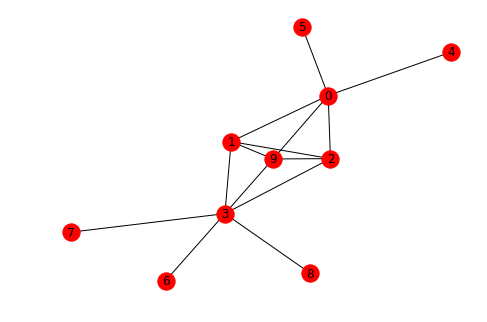

In [75]:
G = symmetry(G, 3)

nx.draw(G,with_labels = True)
plt.show()

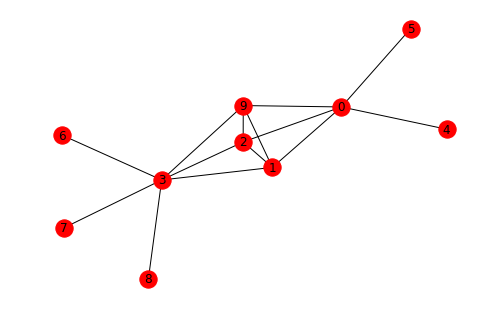

In [41]:
F = nx.Graph()
F.add_nodes_from(range(9))

F.add_edge(0, 1)
F.add_edge(1, 2)
F.add_edge(0, 2)
F.add_edge(1,3)
F.add_edge(2,3)
F.add_edge(0,4)
F.add_edge(0,5)
F.add_edge(3,6)
F.add_edge(3,7)
F.add_edge(3,8)
F.add_edge(3,9)
F.add_edge(0,9)
F.add_edge(1,9)
F.add_edge(2,9)

nx.draw(F,with_labels = True)
plt.show()

In [41]:
F = nx.contracted_nodes(F, 0, 1)


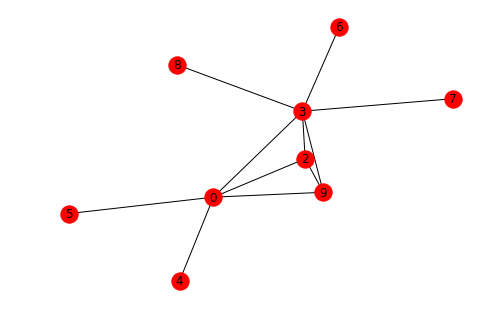

In [43]:
nx.draw(F,with_labels = True)
plt.show()

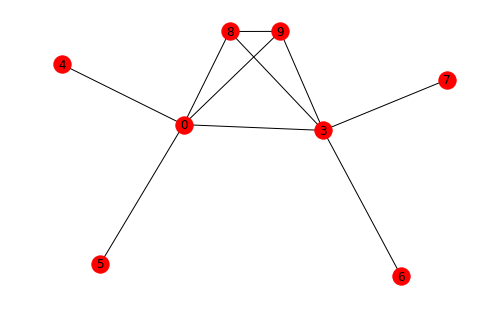

In [44]:
F = nx.contracted_nodes(F, 8, 2)
nx.draw(F,with_labels = True)
plt.show()

# nx.contracted_nodes(F, 8, 2) de node in het eerste argument blijft altijd bestaan.